In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# Cargar publicaciones y avisos

In [2]:
postulaciones = pd.read_csv("../Finger 2/datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=[2], index_col='idaviso')
avisos = pd.read_csv("../Finger 2/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", index_col='idaviso')

/home/jose/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
print(len(postulaciones))
postulaciones.head(10)

3401623


,idpostulante,fechapostulacion
idaviso,,
1112257047,NM5M,2018-01-15 16:22:34
1111920714,NM5M,2018-02-06 09:04:50
1112346945,NM5M,2018-02-22 09:04:47
1112345547,NM5M,2018-02-22 09:04:59
1112237522,5awk,2018-01-25 18:55:03
1112277633,5awk,2018-01-29 13:34:44
1112302347,5awk,2018-02-07 20:49:22
1112291495,5awk,2018-02-07 20:50:13
1112304011,5awk,2018-02-07 20:51:15


In [5]:
print(len(avisos))
avisos.head(5)

13534


,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
idaviso,,,,,,,,,,
8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Publicaciones por Area

## Join de publicaciones y avisos

In [6]:
postulaciones['count_postulaciones'] = 1
avisos['count_avisos'] = 1

In [7]:
postulaciones_avisos = postulaciones.join(avisos[['nombre_area', 'count_avisos']], how='right')

In [54]:
# Replace NaN values
postulaciones_avisos.loc[postulaciones_avisos['count_postulaciones'].isnull(), 'count_postulaciones'] = 0

In [9]:
print(len(postulaciones_avisos))
postulaciones_avisos.head(10)

3076424


,idpostulante,fechapostulacion,count_postulaciones,nombre_area,count_avisos
idaviso,,,,,
1585950,NaN,NaT,0.0,Tecnologia / Sistemas,1
1672250,NaN,NaT,0.0,Ventas,1
1799300,NaN,NaT,0.0,Contabilidad,1
2613010,NaN,NaT,0.0,Jóvenes Profesionales,1
3006520,NaN,NaT,0.0,Call Center,1
5791240,NaN,NaT,0.0,Transporte,1
8725750,4rWEjrA,2018-01-16 21:58:40,1.0,Comercial,1
8725750,qewD0aR,2018-02-06 15:51:54,1.0,Comercial,1
8725750,3N2dBdq,2018-02-08 10:49:43,1.0,Comercial,1


## Agrupar por Area

In [10]:
postulaciones_nombre_area = postulaciones_avisos.groupby('nombre_area').agg({'count_postulaciones': sum})
postulaciones_nombre_area.columns=['cantidad_publicaciones']

Perdimos las postulaciones de los avisos que no estan en la base avisos_detalle, peor nos quedamos con todas las areas (algunas con 0 postulaciones):

In [11]:
print(len(postulaciones_nombre_area['cantidad_publicaciones']))
print(sum(postulaciones_nombre_area['cantidad_publicaciones']))

173
3074206.0


In [12]:
postulaciones_nombre_area.sort_values('cantidad_publicaciones', ascending=True).head(20)

,cantidad_publicaciones
nombre_area,
Arte y Cultura,0.0
Bienestar Estudiantil,0.0
Auditoría Médica,0.0
Quimica,0.0
Instrumentación quirúrgica,0.0
Medicina Laboral,0.0
Farmacia industrial,0.0
Otras Especialidades médicas,0.0
Trabajo social,0.0


## Distribucion

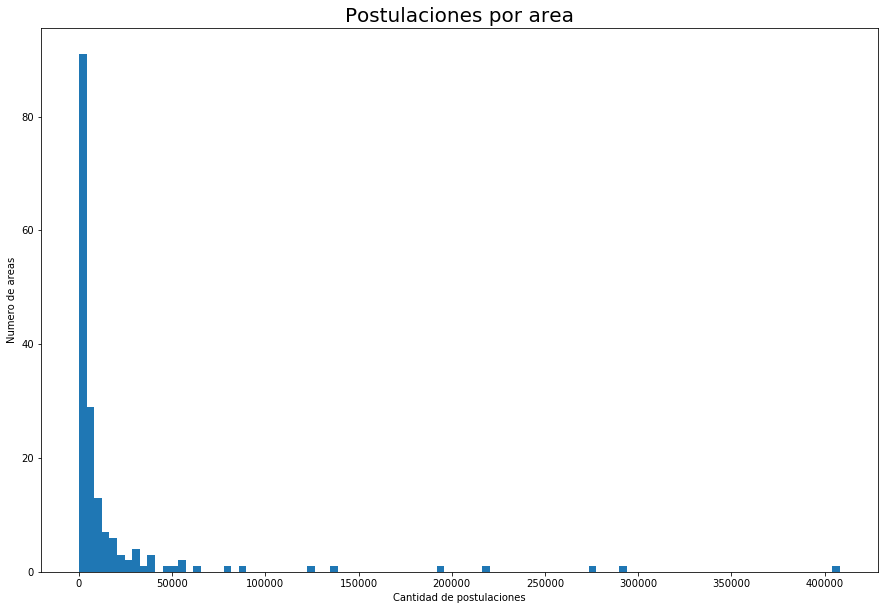

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(postulaciones_nombre_area['cantidad_publicaciones'], bins=100)
ax.set_title('Postulaciones por area', fontdict={'size':20})
ax.set_xlabel('Cantidad de postulaciones')
ax.set_ylabel('Numero de areas')
plt.show()

# Avisos por Area

## Agrupar por area

In [14]:
avisos_area = avisos[['nombre_area']].groupby(['nombre_area']).agg({'nombre_area': len})
avisos_area.columns = ['cantidad_avisos']

In [15]:
print(len(avisos_area))
avisos_area.sort_values(['cantidad_avisos']).tail(10)

173


,cantidad_avisos
nombre_area,
Recursos Humanos,235
Mantenimiento,324
Atención al Cliente,347
Tecnologia / Sistemas,388
Contabilidad,416
Programación,576
Producción,821
Administración,901
Comercial,983


## Distribucion

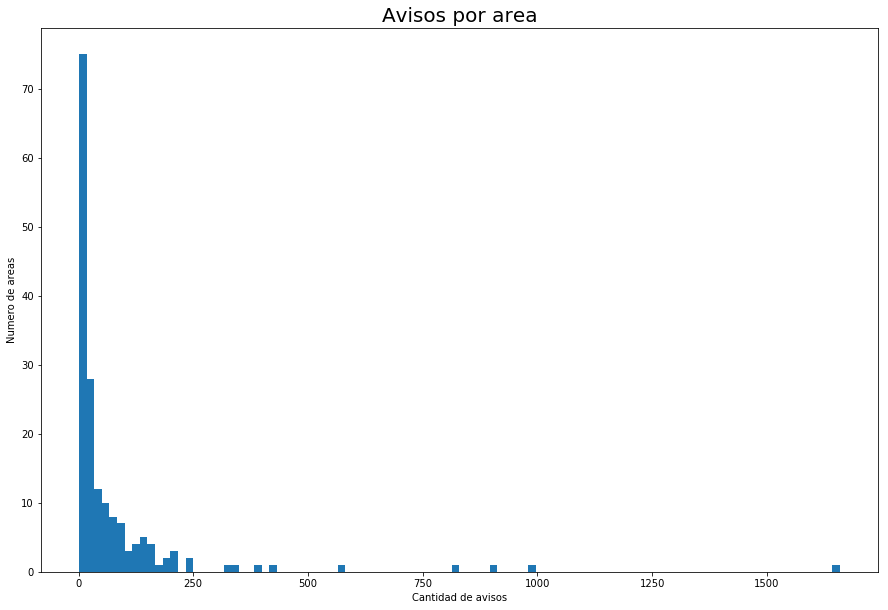

In [64]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(avisos_area['cantidad_avisos'], bins=100)
ax.set_title('Avisos por area', fontdict={'size':20})
ax.set_xlabel('Cantidad de avisos')
ax.set_ylabel('Numero de areas')
plt.show()

# Agrupar Publicaciones y Avisos en la misma tabla

In [47]:
areas = postulaciones_nombre_area.join(avisos_area)

In [48]:
areas['tasa_publicaciones_por_aviso'] = areas['cantidad_publicaciones'] / areas['cantidad_avisos']

In [49]:
areas.sort_values('cantidad_publicaciones', ascending=False, inplace=True)

In [50]:
areas.reset_index(inplace=True)

In [65]:
areas.head(10)

,nombre_area,cantidad_publicaciones,cantidad_avisos,tasa_publicaciones_por_aviso
0,Ventas,408148.0,1659,246.020494
1,Administración,291135.0,901,323.124306
2,Producción,277089.0,821,337.501827
3,Comercial,216677.0,983,220.424212
4,Atención al Cliente,195636.0,347,563.792507
5,Recepcionista,137485.0,151,910.496689
6,Call Center,126430.0,191,661.937173
7,Telemarketing,87506.0,138,634.101449
8,Tesorería,78450.0,137,572.627737
9,Mantenimiento y Limpieza,63308.0,141,448.992908


## Graficar

Nos quedamos con los registros de mayor cantidad de publicaciones

In [52]:
areas_top_100 = areas[areas['cantidad_publicaciones']>=1000]

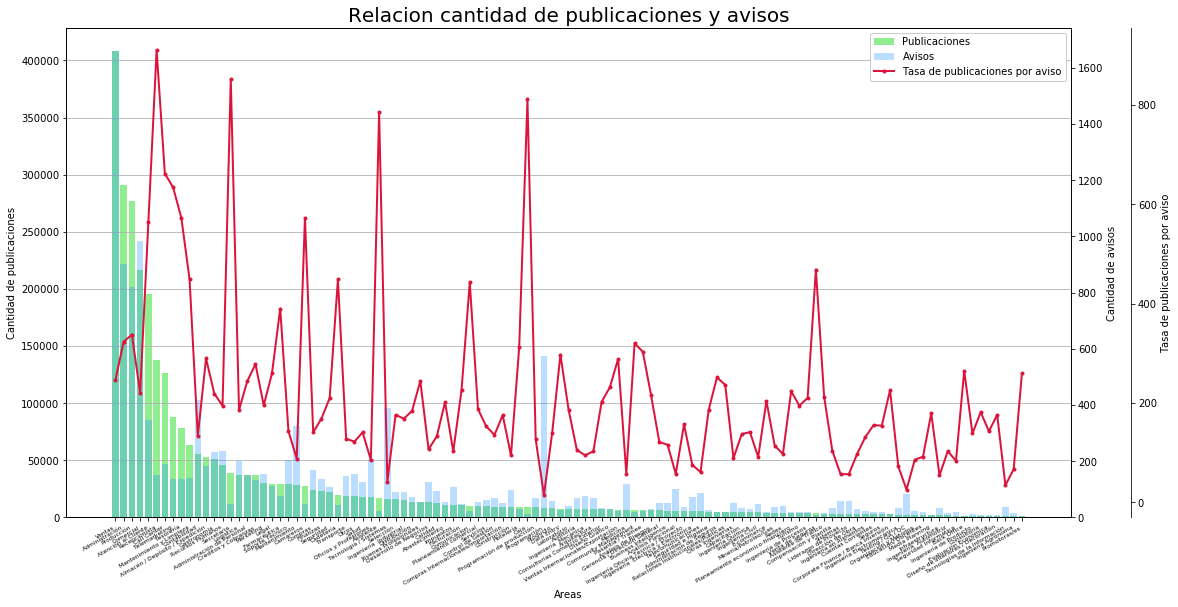

In [53]:
fig, ax = plt.subplots(figsize=(18, 10))
fig.autofmt_xdate()

ax2 = ax.twinx()
ax3 = ax.twinx()

ax.bar(areas_top_100.index.get_values(), areas_top_100['cantidad_publicaciones'], color='lightgreen', label='Publicaciones')
ax2.bar(areas_top_100.index.get_values(), areas_top_100['cantidad_avisos'], color='dodgerblue', alpha=.3, label='Avisos')
ax3.plot(areas_top_100.index.get_values(), areas_top_100['tasa_publicaciones_por_aviso'], '.-', c='crimson', linewidth=2, label='Tasa de publicaciones por aviso')

# See https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend#answer-47370214
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

fig.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=1, framealpha=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.title('Relacion cantidad de publicaciones y avisos', fontdict={'size':20})

ax.grid(axis='y')

ax.set_xlabel('Areas')
ax.set_ylabel('Cantidad de publicaciones')
ax2.set_ylabel('Cantidad de avisos')
ax3.set_ylabel('Tasa de publicaciones por aviso')

ax3.spines['right'].set_position(('outward', 60))      

ax.set_xticks(range(len(areas_top_100)))
ax.set_xticklabels(areas_top_100['nombre_area'], fontdict={'size':6})

plt.show()

## Relacion lineal entre Publicaciones y Avisos

Analizamos la relacion lineal entre estas dos variables. Podemos observar una fuerte correlatividad, lo cual nos invita a postular la hipotesis de que un Area con mayor numero de avisos podria tener mayor cantidad de postulaciones. Lo anterior podria contrastarse a traves de una prueba de hipotesis, variando la cantidad de avisos y observando como responden las postulaciones.

In [24]:
linear = LinearRegression()
linear.fit(areas[['cantidad_avisos']], areas[['cantidad_publicaciones']])
pred_y = linear.predict(areas[['cantidad_avisos']])

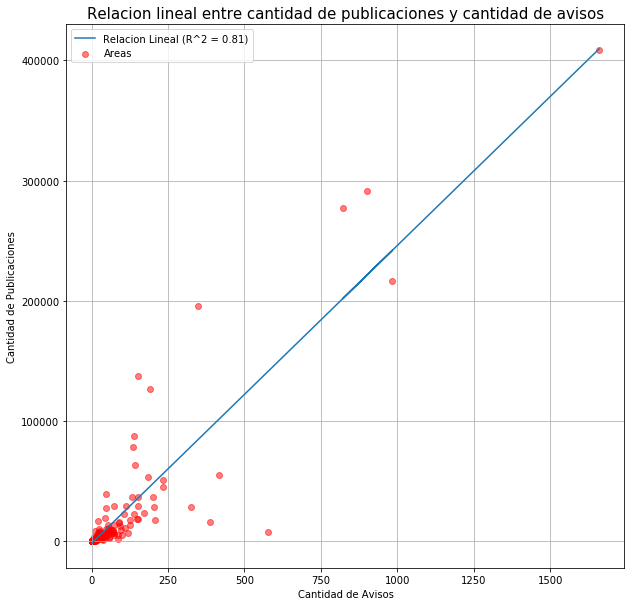

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(areas['cantidad_avisos'], areas['cantidad_publicaciones'], alpha=.5, c='r', label='Areas')
ax.plot(areas['cantidad_avisos'], pred_y, label='Relacion Lineal (R^2 = %.2f)' % r2_score(areas['cantidad_publicaciones'], pred_y))

ax.grid()

plt.title('Relacion lineal entre cantidad de publicaciones y cantidad de avisos', fontdict={'size':15})
plt.xlabel('Cantidad de Avisos')
plt.ylabel('Cantidad de Publicaciones')

plt.legend()

plt.show()